# Tensor de inercia | Cubo

[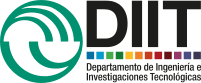](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
Tensor de inercia de un cubo con arista \(b\).
<!---
**Marion e.g. 11-35 y 11-6} Tensor de inercia de un cubo con arista \(b\).
--->
Encuentre:
1. Calcule el tensor de inercia desde el sistema de ejes \(x_i\) con origen en el centro de masa \(O\).
1. Use la forma general del teorema de ejes paralelos de Steiner para calcularlo en el sistema \(X_i\) con origen en el vértice \(Q\) 

![](https://github.com/bettachini/UNLaM_MecanicaGeneral/blob/master/09bTensorInercia/figuras/mFig11-8.png?raw=1)

## Resolución

> **Referencia**  
> Sección 12.2  
> Dinmámica clásica de las partículas y sistemas  
> Jerry B. Marion

### Tensor de inercia desde $O$
El problema nos pide calcular el tensor de inercia.
Esto es todos los momentos y productos de inercia que lo componen. 

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
# import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
Ixx, Ixy, Ixz = sym.symbols('I_{xx} I_{xy} I_{xz}')
Iyx, Iyy, Iyz = sym.symbols('I_{yx} I_{yy} I_{yz}')
Izx, Izy, Izz = sym.symbols('I_{zx} I_{zy} I_{zz}')

In [3]:
I = sym.Eq( sym.Symbol('\overline{\overline{I} }'),
           sym.Matrix([[Ixx, Ixy, Ixz], [Iyx, Iyy, Iyz], [Izx, Izy, Izz]]), 
           evaluate = False
          )
I

                           ⎡I_{xx}  I_{xy}  I_{xz}⎤
                           ⎢                      ⎥
\overline{\overline{I} } = ⎢I_{yx}  I_{yy}  I_{yz}⎥
                           ⎢                      ⎥
                           ⎣I_{zx}  I_{zy}  I_{zz}⎦

Recordamos la expresión de los elementos del tensor de inercia para un sistema continuo
$$
I_{ik} = \iiint \rho(\vec{r}) \left(x_l^2 \delta_{ik} -  x_i x_k \right) dV .
$$
Calcularemos en coordenadas cartesianas, por tanto $dV = dx dy dz$. 
La densidad $\rho = \frac{m}{b^3}$

Empecemos por uno de los momentos de inercia.
El primero tiene $i=x$ e $k=x$
$$
\begin{aligned}
I_{xx} 
&= \iiint \rho(\vec{r}) \left(x^2 + y^2 + z^2 - xx \right) dV\\
&= \frac{m}{b^3} \int_{-b/2}^{b/2} dx \int_{-b/2}^{b/2} dy \int_{-b/2}^{b/2} dz ( y^2 + z^2 ).
\end{aligned}
$$

In [4]:
x, y, z, b, m = sym.symbols('x y z b m')
f_xx = y**2 + z**2
rho_densidad = m/ b**3
Ixx_exp = rho_densidad* sym.integrate(f_xx, (x, -b/2, b/2), (y, -b/2, b/2), (z,-b/2, b/2) )
sym.Eq( Ixx , Ixx_exp )

Los momentos de inercia $I_{yy}$ e $I_{zz}$ son iguales

In [5]:
Iyy_exp = Ixx_exp
Izz_exp = Ixx_exp

Empiezo con los productos de inercia de $i=x$.
El primero sería el que tiene $k=y$
$$
\begin{aligned}
I_{xy} 
&= \iiint \rho(\vec{r}) \left(- xy \right) dV\\
&= \frac{m}{b^3} \int_0^b dz \int_0^b dy \int_0^b dx ( -xy ).
\end{aligned}
$$

In [6]:
f_xy = -x* y
Ixy_exp = rho_densidad* sym.integrate(f_xy, (x, -b/2, b/2), (y, -b/2, b/2), (z, -b/2, b/2) )
sym.Eq( Ixy , Ixy_exp )

Es sencillo comprobar que todos los demás productos de inercia son iguales.

In [7]:
Ixz_exp = Ixy_exp
Iyx_exp = Ixy_exp
Iyz_exp = Ixy_exp
Izx_exp = Ixy_exp
Izy_exp = Ixy_exp

Por tanto el tensor de inercia calculado desde el centro de masa $O$ con los ejes orientados como muestra la figura es

In [8]:
subsI = {
    Ixx: Ixx_exp,
    Ixy: Ixy_exp,
    Ixz: Ixz_exp,
    Iyx: Iyx_exp,
    Iyy: Iyy_exp,
    Iyz: Iyz_exp,
    Izx: Izx_exp,
    Izy: Izy_exp,
    Izz: Izz_exp
}
I_subs = sym.Eq(sym.Symbol('\overline{\overline{I} }_O'), I.rhs.subs(subsI), evaluate = False )
I_subs

                             ⎡ 2              ⎤
                             ⎢b ⋅m            ⎥
                             ⎢────   0     0  ⎥
                             ⎢ 6              ⎥
                             ⎢                ⎥
                             ⎢       2        ⎥
                             ⎢      b ⋅m      ⎥
\overline{\overline{I} }_O = ⎢ 0    ────   0  ⎥
                             ⎢       6        ⎥
                             ⎢                ⎥
                             ⎢             2  ⎥
                             ⎢            b ⋅m⎥
                             ⎢ 0     0    ────⎥
                             ⎣             6  ⎦

### Traslado de $\overline{\overline{I} }$ al vertice $Q$ con el teorema de Steiner

Si los ejes $x'_i$ no parten del centro de masa
$$
I'_{ik} = I_{ik} + m (a^2 \delta_{ik} - a_i a_k ) 
$$
donde $\vec{a}$ va del centro de masa a este sistema. Esta expresión se llama **teorema de Steiner**.

En este caso $\vec{a} = \vec{OQ} = -\frac{b}{2} \hat{x} + (-\frac{b}{2}) \hat{y} + (-\frac{b}{2}) \hat{z} = -\frac{b}{2} \left( \hat{x} + \hat{y} + \hat{z} \right)$, por lo que para obtener $I'_{ik}$ hay que sumar al $I_{ik}$ calculado en el punto anterior $m (a^2 \delta_{ik} - a_i a_k )$.

Para los elementos en la diagonal en que $i=k$, hay que calcular
$$
\vec{a}^2 = \frac{b^2}{4} \left( \hat{x} + \hat{y} + \hat{z} \right) \cdot \left( \hat{x} + \hat{y} + \hat{z} \right) = \frac{3 b^2}{4},
$$
en tanto que todos los $- a_i a_k$ valen
$$
- a_i a_k = - \left(-\frac{b}{2} \right) \left( -\frac{b}{2} \right) = - \frac{b^2}{4}.
$$

Queda entonces que el tensor de Steiner a restar del obtenido anteriormente es
$$
m (a^2 \delta_{ik} - a_i a_k )
= m \frac{b^2}{4}
\begin{pmatrix}
3 -1 & -1 & -1 \\
-1 & 3 -1 & -1 \\
-1 & -1 & 3 -1 \\
\end{pmatrix}
= m \frac{b^2}{4}
\begin{pmatrix}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 \\
\end{pmatrix}
$$

In [9]:
steiner = (m* b**2/ 4)* sym.Matrix([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])
steiner

⎡  2       2       2   ⎤
⎢ b ⋅m   -b ⋅m   -b ⋅m ⎥
⎢ ────   ──────  ──────⎥
⎢  2       4       4   ⎥
⎢                      ⎥
⎢  2       2       2   ⎥
⎢-b ⋅m    b ⋅m   -b ⋅m ⎥
⎢──────   ────   ──────⎥
⎢  4       2       4   ⎥
⎢                      ⎥
⎢  2       2       2   ⎥
⎢-b ⋅m   -b ⋅m    b ⋅m ⎥
⎢──────  ──────   ──── ⎥
⎣  4       4       2   ⎦

In [10]:
I_Q = sym.Eq( sym.Symbol('\overline{\overline{I} }_Q') , I_subs.rhs + steiner, evaluate = False )
I_Q

                             ⎡   2      2       2   ⎤
                             ⎢2⋅b ⋅m  -b ⋅m   -b ⋅m ⎥
                             ⎢──────  ──────  ──────⎥
                             ⎢  3       4       4   ⎥
                             ⎢                      ⎥
                             ⎢  2        2      2   ⎥
                             ⎢-b ⋅m   2⋅b ⋅m  -b ⋅m ⎥
\overline{\overline{I} }_Q = ⎢──────  ──────  ──────⎥
                             ⎢  4       3       4   ⎥
                             ⎢                      ⎥
                             ⎢  2       2        2  ⎥
                             ⎢-b ⋅m   -b ⋅m   2⋅b ⋅m⎥
                             ⎢──────  ──────  ──────⎥
                             ⎣  4       4       3   ⎦